### **ITSP of SER (Frequency)**

Importing the necessary modules

In [ ]:
import tensorflow as tf
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import math

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip -u '/content/gdrive/MyDrive/Frequency_dataset/archive'

Streaming output truncated to the last 5000 lines.
  inflating: Train/Train/Ses02M_impro04_M005.wav  
  inflating: Train/Train/Ses02M_impro04_M006.wav  
  inflating: Train/Train/Ses02M_impro04_M007.wav  
  inflating: Train/Train/Ses02M_impro04_M008.wav  
  inflating: Train/Train/Ses02M_impro04_M009.wav  
  inflating: Train/Train/Ses02M_impro04_M010.wav  
  inflating: Train/Train/Ses02M_impro04_M011.wav  
  inflating: Train/Train/Ses02M_impro04_M012.wav  
  inflating: Train/Train/Ses02M_impro04_M013.wav  
  inflating: Train/Train/Ses02M_impro04_M014.wav  
  inflating: Train/Train/Ses02M_impro04_M015.wav  
  inflating: Train/Train/Ses02M_impro04_M016.wav  
  inflating: Train/Train/Ses02M_impro04_M017.wav  
  inflating: Train/Train/Ses02M_impro04_M018.wav  
  inflating: Train/Train/Ses02M_impro04_M019.wav  
  inflating: Train/Train/Ses02M_impro04_M020.wav  
  inflating: Train/Train/Ses02M_impro04_M021.wav  
  inflating: Train/Train/Ses02M_impro04_M022.wav  
  inflating: Train/Train/Ses02M



# Data Preprocessing:
Processing of Training dataset

In [ ]:
useful_labels={ "ang" , "sad" , "hap", "exc"}

In [ ]:
numerical_labels = {
        "ang": 0,   
        "sad": 1,
        "hap": 2,
        "exc": 2
    }

In [ ]:
def load_train(data_set ):

  feature_mel_train_m = []
  feature_mfcc_train_m = []
  labels_m = []
  feature_mel_train_f = []
  feature_mfcc_train_f = []
  labels_f = []
  for r in range(data_set.shape[0]):
    if data_set["emotion"][r] in useful_labels:
      if data_set["wav_file"][r][-4] == 'M': #male voices
        file_name = "Train/Train/"+data_set["wav_file"][r]+".wav"
        labels_m.append(data_set["emotion"][r])
        y, sr = librosa.load(file_name)
        mel = np.mean(librosa.feature.melspectrogram(y=y , n_mels = 256).T , axis = 0 )
        mfcc = np.mean(librosa.feature.mfcc(y=y , n_mfcc = 40).T , axis = 0 )
        feature_mel_train_m.append(mel)
        feature_mfcc_train_m.append(mfcc)
      elif data_set["wav_file"][r][-4] == 'F': #female voices
        file_name = "Train/Train/"+data_set["wav_file"][r]+".wav"
        labels_f.append(data_set["emotion"][r])
        y, sr = librosa.load(file_name)
        mel = np.mean(librosa.feature.melspectrogram(y=y , n_mels = 256).T , axis = 0 )
        mfcc = np.mean(librosa.feature.mfcc(y=y , n_mfcc = 40).T , axis = 0 )
        feature_mel_train_f.append(mel)
        feature_mfcc_train_f.append(mfcc)
      
  return np.asarray(feature_mel_train_m),np.asarray(feature_mfcc_train_m),np.asarray(labels_m),np.asarray(feature_mel_train_f),np.asarray(feature_mfcc_train_f),np.asarray(labels_f)

In [ ]:
for z in range(0,3):
    csv_file = "df_IEMOCAP/df_IEMOCAP/df_iemocap_" + str(z+1) + ".csv"

    data_file = pd.read_csv(csv_file)
    if z==0 :
      mel_train_m,mfcc_train_m,labels_m_train,mel_train_f,mfcc_train_f,labels_f_train = load_train(data_file)
      
    else:
      mel_temp_m , mfcc_temp_m, label_temp_m, mel_temp_f , mfcc_temp_f, label_temp_f = load_train(data_file)
      mel_train_m = np.concatenate((mel_train_m , mel_temp_m))
      mfcc_train_m = np.concatenate((mfcc_train_m , mfcc_temp_m))
      labels_m_train = np.concatenate((labels_m_train , label_temp_m))
      mel_train_f = np.concatenate((mel_train_f , mel_temp_f))
      mfcc_train_f = np.concatenate((mfcc_train_f , mfcc_temp_f))
      labels_f_train = np.concatenate((labels_f_train , label_temp_f))


In [ ]:
y_train_m = np.asarray([numerical_labels[s]for s in labels_m_train])
print(y_train_m.shape)
y_train_f = np.asarray([numerical_labels[s]for s in labels_f_train])
print(y_train_f.shape)

(1098,)
(1095,)


Processing of Validation dataset

In [ ]:
def load_validate():

  csv_file = "df_IEMOCAP/df_IEMOCAP/df_iemocap_4.csv"
  data_set = pd.read_csv(csv_file)

  feature_mel_val_m = []
  feature_mfcc_val_m = []
  labels_m = []
  feature_mel_val_f = []
  feature_mfcc_val_f = []
  labels_f = []
  for r in range(data_set.shape[0]):
    if data_set["emotion"][r] in useful_labels:
      if data_set["wav_file"][r][-4] == 'M': #male voices
        file_name = "Train/Train/"+data_set["wav_file"][r]+".wav"
        labels_m.append(data_set["emotion"][r])
        y, sr = librosa.load(file_name)
        mel = np.mean(librosa.feature.melspectrogram(y=y , n_mels = 256).T , axis = 0 )
        mfcc = np.mean(librosa.feature.mfcc(y=y , n_mfcc = 40).T , axis = 0 )
        feature_mel_val_m.append(mel)
        feature_mfcc_val_m.append(mfcc)
      elif data_set["wav_file"][r][-4] == 'F': #female voices
        file_name = "Train/Train/"+data_set["wav_file"][r]+".wav"
        labels_f.append(data_set["emotion"][r])
        y, sr = librosa.load(file_name)
        mel = np.mean(librosa.feature.melspectrogram(y=y , n_mels = 256).T , axis = 0 )
        mfcc = np.mean(librosa.feature.mfcc(y=y , n_mfcc = 40).T , axis = 0 )
        feature_mel_val_f.append(mel)
        feature_mfcc_val_f.append(mfcc)
      
  return np.asarray(feature_mel_val_m),np.asarray(feature_mfcc_val_m),np.asarray(labels_m),np.asarray(feature_mel_val_f),np.asarray(feature_mfcc_val_f),np.asarray(labels_f)

In [ ]:
mel_val_m,mfcc_val_m,labels_m_validate,mel_val_f,mfcc_val_f,labels_f_validate = load_validate()

In [ ]:
y_val_m = np.array([[numerical_labels[s]] for s in labels_m_validate])
print(y_val_m.shape)
y_val_f = np.array([[numerical_labels[s]] for s in labels_f_validate])
print(y_val_f.shape)

(321, 1)
(452, 1)


In [ ]:
def load_test():

  csv_file = "df_IEMOCAP/df_IEMOCAP/df_iemocap_5.csv"
  data_set = pd.read_csv(csv_file)

  feature_mel_test_m = []
  feature_mfcc_test_m = []
  labels_m = []
  feature_mel_test_f = []
  feature_mfcc_test_f = []
  labels_f = []
  for r in range(data_set.shape[0]):
    if data_set["emotion"][r] in useful_labels:
      if data_set["wav_file"][r][-4] == 'M': #male voices
        file_name = "Test/Test/"+data_set["wav_file"][r]+".wav"
        labels_m.append(data_set["emotion"][r])
        y, sr = librosa.load(file_name)
        mel = np.mean(librosa.feature.melspectrogram(y=y , n_mels = 256).T , axis = 0 )
        mfcc = np.mean(librosa.feature.mfcc(y=y , n_mfcc = 40).T , axis = 0 )
        feature_mel_test_m.append(mel)
        feature_mfcc_test_m.append(mfcc)
      elif data_set["wav_file"][r][-4] == 'F': #female voices
        file_name = "Test/Test/"+data_set["wav_file"][r]+".wav"
        labels_f.append(data_set["emotion"][r])
        y, sr = librosa.load(file_name)
        mel = np.mean(librosa.feature.melspectrogram(y=y , n_mels = 256).T , axis = 0 )
        mfcc = np.mean(librosa.feature.mfcc(y=y , n_mfcc = 40).T , axis = 0 )
        feature_mel_test_f.append(mel)
        feature_mfcc_test_f.append(mfcc)
      
  return np.asarray(feature_mel_test_m),np.asarray(feature_mfcc_test_m),np.asarray(labels_m),np.asarray(feature_mel_test_f),np.asarray(feature_mfcc_test_f),np.asarray(labels_f)

In [ ]:
mel_test_m,mfcc_test_m,labels_m_test,mel_test_f,mfcc_test_f,labels_f_test = load_test()

In [ ]:
y_test_m = np.array([[numerical_labels[s]] for s in labels_m_test])
print(y_test_m.shape)
y_test_f = np.array([[numerical_labels[s]] for s in labels_f_test])
print(y_test_f.shape)

(488, 1)
(369, 1)


## Final Model:

In [ ]:
from tensorflow import keras
from keras import layers
import keras
from matplotlib import pyplot as plt

MEL(male)

In [ ]:
input_sequence = layers.Input(shape=(256,1), dtype="float64")
kernel_size = [3,5,7,9]
parallel_layers = []
for i in range(4):  
  x = layers.Conv1D(128, kernel_size[i], activation="relu", padding="same")(input_sequence)
  x = layers.MaxPooling1D(4,strides = 8//(i+1) , padding= 'same')(x)
  parallel_layers.append(x)
x = tf.keras.layers.Concatenate(axis=1)(parallel_layers)
x = layers.Flatten()(x)
x = layers.Dense(400, activation="tanh")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(200, activation="tanh")(x)
x = layers.Dense(3, activation="softmax")(x)
model_mel_m = keras.Model(input_sequence, x)
model_mel_m.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 256, 128)     512         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 256, 128)     768         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 256, 128)     1024        input_2[0][0]                    
____________________________________________________________________________________________

In [ ]:

model_mel_m.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"] 
)


In [ ]:
history = model_mel_m.fit(mel_train_m, y_train_m, batch_size= 64, epochs= 50, validation_data=(mel_val_m, y_val_m))

Epoch 1/50
18/18 [==============================] - 6s 346ms/step - loss: 0.0814 - acc: 0.9690 - val_loss: 3.6664 - val_acc: 0.5078
Epoch 2/50
18/18 [==============================] - 6s 340ms/step - loss: 0.0644 - acc: 0.9772 - val_loss: 3.3709 - val_acc: 0.5639
Epoch 3/50
18/18 [==============================] - 6s 331ms/step - loss: 0.0520 - acc: 0.9818 - val_loss: 3.4035 - val_acc: 0.5607
Epoch 4/50
18/18 [==============================] - 6s 331ms/step - loss: 0.0519 - acc: 0.9818 - val_loss: 3.6172 - val_acc: 0.5202
Epoch 5/50
18/18 [==============================] - 6s 334ms/step - loss: 0.0406 - acc: 0.9854 - val_loss: 3.6908 - val_acc: 0.5358
Epoch 6/50
18/18 [==============================] - 6s 332ms/step - loss: 0.0514 - acc: 0.9863 - val_loss: 3.3389 - val_acc: 0.5265
Epoch 7/50
18/18 [==============================] - 6s 329ms/step - loss: 0.0491 - acc: 0.9809 - val_loss: 3.7334 - val_acc: 0.5109
Epoch 8/50
18/18 [==============================] - 6s 342ms/step - loss: 0.

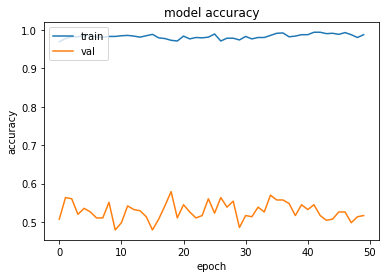

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model_mel_m.evaluate(mel_test_m, y_test_m, batch_size = 64)

8/8 [==============================] - 1s 75ms/step - loss: 4.2925 - acc: 0.5246


[4.2925190925598145, 0.5245901346206665]

MEL(female)

In [ ]:
input_sequence = layers.Input(shape=(256,1), dtype="float64")
kernel_size = [3,5,7,9]
parallel_layers = []
for i in range(4):  
  x = layers.Conv1D(128, kernel_size[i], activation="relu", padding="same")(input_sequence)
  x = layers.MaxPooling1D(4,strides = 8//(i+1) , padding= 'same')(x)
  parallel_layers.append(x)
x = tf.keras.layers.Concatenate(axis=1)(parallel_layers)
x = layers.Flatten()(x)
x = layers.Dense(400, activation="tanh")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(200, activation="tanh")(x)
x = layers.Dense(3, activation="softmax")(x)
model_mel_f = keras.Model(input_sequence, x)
model_mel_f.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 256, 128)     512         input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 256, 128)     768         input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 256, 128)     1024        input_3[0][0]                    
____________________________________________________________________________________________

In [ ]:

model_mel_f.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"] 
)


In [ ]:
history = model_mel_f.fit(mel_train_f, y_train_f, batch_size= 64, epochs=200, validation_data=(mel_val_f, y_val_f))

Epoch 1/200
18/18 [==============================] - 9s 404ms/step - loss: 1.3414 - acc: 0.4575 - val_loss: 0.8323 - val_acc: 0.5133
Epoch 2/200
18/18 [==============================] - 6s 361ms/step - loss: 0.8837 - acc: 0.5418 - val_loss: 0.8907 - val_acc: 0.5243
Epoch 3/200
18/18 [==============================] - 6s 359ms/step - loss: 0.8262 - acc: 0.5924 - val_loss: 0.9255 - val_acc: 0.5288
Epoch 4/200
18/18 [==============================] - 6s 358ms/step - loss: 0.7728 - acc: 0.6209 - val_loss: 0.8648 - val_acc: 0.5509
Epoch 5/200
18/18 [==============================] - 6s 355ms/step - loss: 0.8466 - acc: 0.5704 - val_loss: 0.9403 - val_acc: 0.5155
Epoch 6/200
18/18 [==============================] - 6s 352ms/step - loss: 0.7866 - acc: 0.6148 - val_loss: 0.8085 - val_acc: 0.5465
Epoch 7/200
18/18 [==============================] - 6s 355ms/step - loss: 0.7334 - acc: 0.6486 - val_loss: 0.8726 - val_acc: 0.5531
Epoch 8/200
18/18 [==============================] - 6s 355ms/step - 

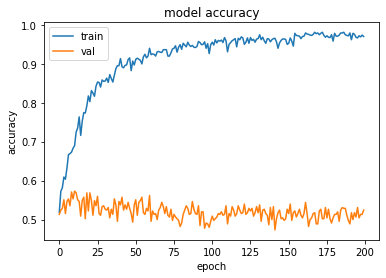

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model_mel_f.evaluate(mel_test_f, y_test_f, batch_size = 64)

6/6 [==============================] - 0s 73ms/step - loss: 3.4657 - acc: 0.5610


[3.4657394886016846, 0.5609756112098694]

MFCC(male)

In [ ]:
input_sequence = layers.Input(shape=(40,1), dtype="float64")
kernel_size = [3,5,7,9]
parallel_layers = []
for i in range(4):  
  x = layers.Conv1D(128, kernel_size[i], activation="relu", padding="same")(input_sequence)
  x = layers.MaxPooling1D(4,strides = 8//(i+1) , padding= 'same')(x)
  parallel_layers.append(x)
x = tf.keras.layers.Concatenate(axis=1)(parallel_layers)
x = layers.Flatten()(x)
x = layers.Dense(400, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(3, activation="softmax")(x)
model_mfcc_m = keras.Model(input_sequence, x)
model_mfcc_m.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 40, 1)]      0                                            
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 40, 128)      512         input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 40, 128)      768         input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 40, 128)      1024        input_4[0][0]                    
____________________________________________________________________________________________

In [ ]:
model_mfcc_m.compile(
    loss="sparse_categorical_crossentropy", optimizer="adadelta", metrics=["acc"] 
)

In [ ]:
history = model_mfcc_m.fit(mfcc_train_m, y_train_m, batch_size= 64, epochs=200, validation_data=(mfcc_val_m, y_val_m))

Epoch 1/200
18/18 [==============================] - 3s 94ms/step - loss: 4.7510 - acc: 0.4184 - val_loss: 1.2890 - val_acc: 0.3583
Epoch 2/200
18/18 [==============================] - 1s 68ms/step - loss: 4.9702 - acc: 0.3544 - val_loss: 1.0654 - val_acc: 0.4455
Epoch 3/200
18/18 [==============================] - 1s 65ms/step - loss: 4.5391 - acc: 0.3460 - val_loss: 1.3267 - val_acc: 0.3520
Epoch 4/200
18/18 [==============================] - 1s 66ms/step - loss: 4.3110 - acc: 0.3633 - val_loss: 1.3664 - val_acc: 0.3645
Epoch 5/200
18/18 [==============================] - 1s 65ms/step - loss: 4.0623 - acc: 0.3789 - val_loss: 1.1869 - val_acc: 0.4299
Epoch 6/200
18/18 [==============================] - 1s 64ms/step - loss: 4.0665 - acc: 0.3695 - val_loss: 1.1575 - val_acc: 0.4673
Epoch 7/200
18/18 [==============================] - 1s 67ms/step - loss: 4.0424 - acc: 0.3893 - val_loss: 1.2439 - val_acc: 0.4393
Epoch 8/200
18/18 [==============================] - 1s 66ms/step - loss: 4.

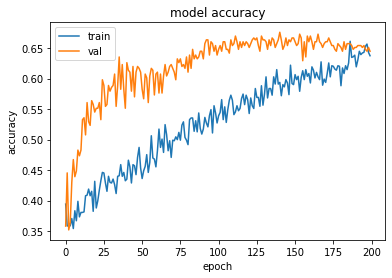

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model_mfcc_m.evaluate(mfcc_test_m, y_test_m, batch_size = 64)

8/8 [==============================] - 0s 13ms/step - loss: 0.8893 - acc: 0.5820


[0.8892655372619629, 0.5819672346115112]

MFCC(female)

In [ ]:
input_sequence = layers.Input(shape=(40,1), dtype="float64")
kernel_size = [3,5,7,9]
parallel_layers = []
for i in range(4):  
  x = layers.Conv1D(128, kernel_size[i], activation="relu", padding="same")(input_sequence)
  x = layers.MaxPooling1D(4,strides = 8//(i+1) , padding= 'same')(x)
  parallel_layers.append(x)
x = tf.keras.layers.Concatenate(axis=1)(parallel_layers)
x = layers.Flatten()(x)
x = layers.Dense(400, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(3, activation="softmax")(x)
model_mfcc_f = keras.Model(input_sequence, x)
model_mfcc_f.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 40, 1)]      0                                            
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, 40, 128)      512         input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 40, 128)      768         input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_18 (Conv1D)              (None, 40, 128)      1024        input_5[0][0]                    
____________________________________________________________________________________________

In [ ]:
model_mfcc_f.compile(
    loss="sparse_categorical_crossentropy", optimizer="adadelta", metrics=["acc"] 
)

In [ ]:
history = model_mfcc_f.fit(mfcc_train_f, y_train_f, batch_size= 64, epochs=50, validation_data=(mfcc_val_f, y_val_f))

Epoch 1/50
18/18 [==============================] - 1s 77ms/step - loss: 0.7329 - acc: 0.6658 - val_loss: 0.8433 - val_acc: 0.5642
Epoch 2/50
18/18 [==============================] - 1s 70ms/step - loss: 0.7226 - acc: 0.6804 - val_loss: 0.8517 - val_acc: 0.5730
Epoch 3/50
18/18 [==============================] - 1s 73ms/step - loss: 0.7183 - acc: 0.6694 - val_loss: 0.8513 - val_acc: 0.5774
Epoch 4/50
18/18 [==============================] - 1s 72ms/step - loss: 0.7303 - acc: 0.6603 - val_loss: 0.8283 - val_acc: 0.5819
Epoch 5/50
18/18 [==============================] - 1s 75ms/step - loss: 0.7398 - acc: 0.6804 - val_loss: 0.8199 - val_acc: 0.5841
Epoch 6/50
18/18 [==============================] - 1s 73ms/step - loss: 0.7199 - acc: 0.6785 - val_loss: 0.8299 - val_acc: 0.5774
Epoch 7/50
18/18 [==============================] - 1s 76ms/step - loss: 0.7238 - acc: 0.6575 - val_loss: 0.8278 - val_acc: 0.6062
Epoch 8/50
18/18 [==============================] - 1s 74ms/step - loss: 0.7113 - a

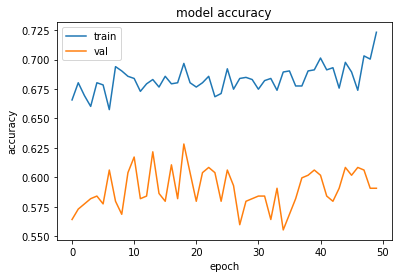

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model_mfcc_f.evaluate(mfcc_test_f, y_test_f, batch_size = 64)

6/6 [==============================] - 0s 16ms/step - loss: 0.7606 - acc: 0.6341


[0.7605850696563721, 0.6341463327407837]

In [ ]:
%cd /content/gdrive/MyDrive/Models
model_mel_m.save("Mel_Based_Detector_M.h5")
model_mel_f.save("Mel_Based_Detector_F.h5")
model_mfcc_m.save("MFCC_Based_Detector_M.h5")
model_mfcc_f.save("MFCC_Based_Detector_F.h5")

/content/gdrive/MyDrive/Models
